In [215]:
from sklearn import svm,metrics
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
# matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
matplotlib.rcParams['font.family'] = 'AppleGothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [216]:
# [ 도미 ]
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0,
33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0,
610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
# [ 빙어 ]
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [217]:
len(bream_length) # 도미 데이터 - 35
# len(smelt_length) # 빙어 데이터 - 14

35

##### length -> 합치기 (bream_length,smelt_length)
##### weight -> 합치기 (bream_weight,smelt_weight)
##### 도미 : 1, 빙어 : 0
##### results = [1] * 35, [0] * 14

##### datas =  [length, weight , results] 합치기

In [218]:
# 데이터의 전처리 과정
# train_input, test_input, train_target, test_target
length = bream_length + smelt_length
weight = bream_weight + smelt_weight
len(length)
results = [1]*35+[0]*14

In [219]:
# zip() : 반복해서 각각 list 데이터를 1개씩 뽑아서 전달해줌
# data = [[l,w,r] for l,w,r in zip(length,weight,result)]
datas = [[l,w] for l,w in zip(length,weight)]
# for i in range(len(length)):
#     data.append([length[i],weight[i],result[i]])

# df = pd.DataFrame(datas) # datas 와 result 결합해서 한 거
print(datas,end='\t')

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]	

##### train_input, test_input, train_target, test_target

In [220]:
# datas,results 49개를
# datas : train_input:35개,test_input:14개
# results : train_target:35개,test_target:14개
# 파이썬 random함수를 사용해서
# 49개 중 35개 데이터는 train_input,train_target  / 14개는 test_input,test_target
# 출력하시오.

In [221]:
idx = [i for i in range(49)]
random.shuffle(idx)

In [222]:
train_input = [datas[i] for i in idx[:35]]
# df.iloc[idx[:35],:-1]
test_input = [datas[i] for i in idx[35:]]
# df.iloc[idx[35:],:-1]
train_target = [results[i] for i in idx[:35]]
# df.iloc[idx[:35],2]
test_target = [results[i] for i in idx[35:]]
# df.iloc[idx[35:],2]


In [223]:
df_train = pd.DataFrame(train_input)
df_train.head(1)
df_test = pd.DataFrame(test_input)
df_test.head(1)

,0,1
0,12.0,9.8


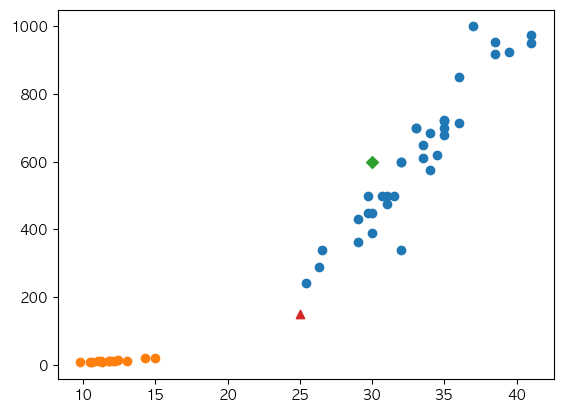

In [233]:
plt.scatter(bream_length,bream_weight)
plt.scatter(smelt_length,smelt_weight)
plt.scatter(30,600,marker="D") # 예측 값 확인
plt.scatter(25,150,marker="^") # 예측 값 확인

plt.show()

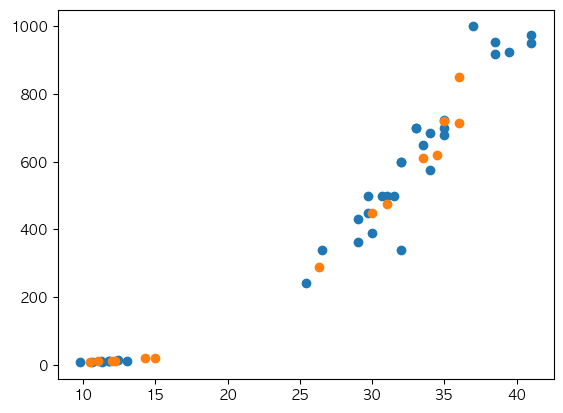

In [225]:
plt.scatter(df_train[0],df_train[1])
plt.scatter(df_test[0],df_test[1])
plt.show()

In [235]:
# 데이터 학습하기
from sklearn.neighbors import KNeighborsClassifier

# clf = svm.SVC()
clf = KNeighborsClassifier()

clf.fit(train_input,train_target)

# 데이터 예측하기
pre = clf.predict(test_input)
print("예측데이터값 : ",pre)

예측데이터값 :  [0 1 0 1 0 1 0 1 1 1 1 0 0 1]


In [247]:
# train_input 몇번째 index 데이터를 사용했는지 알려줌.
distances, indexs = clf.kneighbors([[25,150]])

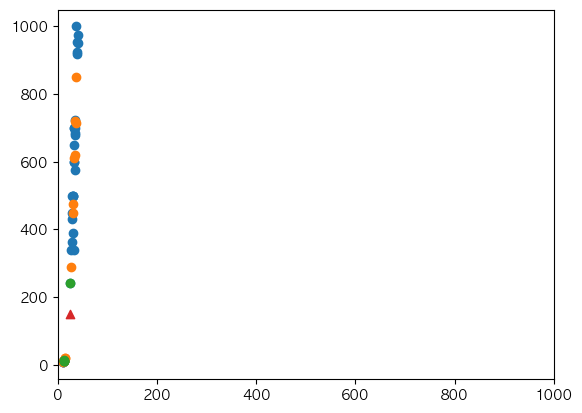

In [250]:
plt.xlim(0,1000)
plt.scatter(df_train[0],df_train[1])
plt.scatter(df_test[0],df_test[1])
plt.scatter(df_train.iloc[indexs[0],0],df_train.iloc[indexs[0],1])

plt.scatter(25,150,marker="^") # 예측 값 확인
plt.show()

In [228]:
# 정답률 구하기
score = clf.score(test_input,test_target)
print('정답률 : ',score)

정답률 :  1.0


In [229]:
# 길이 30, 무게 600 고기 무엇인지 판단하시오.
# [30,600]
data1 = [[30,600]]
pre = clf.predict(data1)
print("예측한 답 : ",pre)

예측한 답 :  [1]


In [230]:
# 길이 25, 무게 150 고기 # 그래프 상으로 도미와 가깝지만 빙어로 나옴 -> 데이터 간 거리
data2 = [[25,150]]
pre = clf.predict(data2)
print("예측한 답 : ",pre)

예측한 답 :  [0]
